In [64]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Code is hidden. <a href="javascript:code_toggle()">Please, click here to view the code</a>.''')

# Word analysis of the description in the loan application

Here we look at the most common words used by the applicants during the loan application. The first figure are the top 200 words used by customers who could not make the payments on time. The second figure consists of words that are used more frequently by applicants with bad loans compared to applicants with good loans. 

<center>200 Most Common Word Used By Applicants with Bad Loans</center>

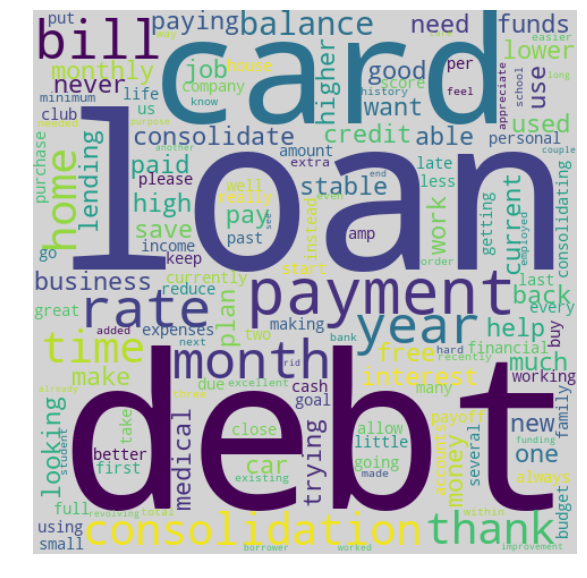

In [61]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=480, height=480, margin=0,background_color="lightgrey"
                     ).generate(' '.join(df2_list))
 
# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


<center>Most Common Word Used More Frequently BY Applicants with Bad Loans </center>

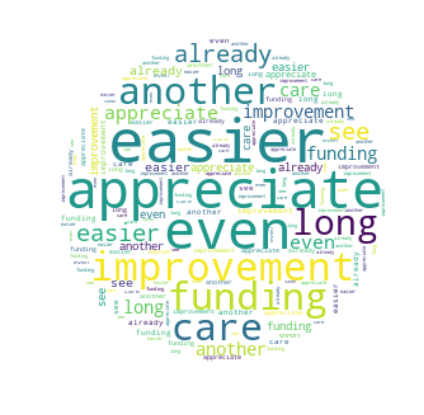

In [63]:
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(' '.join(word_list))

plt.figure( figsize=(7,7) )
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [62]:
import sys
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
%matplotlib inline

In [ ]:
frames = []

In [ ]:
import glob
files2016 = glob.glob('loanstats/LoanStats_2016*.csv')
for file in files2016:
    data = pd.read_csv(file,skiprows=1,low_memory=False)
    frames.append(data)

In [ ]:
files2017 = glob.glob('loanstats/LoanStats_2017*.csv')
for file in files2017:
    data = pd.read_csv(file,skiprows=1,low_memory=False)
    frames.append(data)

In [ ]:
data = pd.read_csv('loanstats/LoanStats4.csv',skiprows=1,low_memory=False)
frames.append(data)

In [ ]:
filesremain = glob.glob('loanstats/LoanStats3*.csv')
for file in filesremain:
    data = pd.read_csv(file,skiprows=1,low_memory=False)
    frames.append(data)

In [ ]:
loan=pd.concat(frames)
print(loan.shape)
loan.head()

In [ ]:
loan = loan.iloc[:,2:36]
col = loan.columns
col

In [ ]:
loan['desc'].fillna('NA',inplace=True)

In [ ]:
#loan=original
drop_cols=[]
check_val = 0.9*loan.shape[0]
for c in col:
    if loan[c].isnull().sum() > check_val:
        drop_cols.append(c)
loan.drop(drop_cols,axis=1,inplace=True)
loan.info(verbose=True)

In [ ]:
loan.isnull().sum()

In [ ]:
#deal with the null values
loan.drop(['zip_code','mths_since_last_delinq','revol_util','dti','mths_since_last_record',
          'funded_amnt', 'funded_amnt_inv'],axis=1,inplace=True)
loan.emp_length.fillna(0,inplace=True)
loan.emp_title.fillna('NA',inplace=True)
loan.emp_title.isnull().sum()
loan.dropna(inplace=True)

In [ ]:
print(loan.shape)
loan.head(1)

In [ ]:
df_sentiment = loan[(loan['loan_status'] == "Late (31-120 days)") |
                   (loan['loan_status'] == "Defer") |
                   (loan['loan_status'] == "Charged Off") |
                   (loan['loan_status'] == "In Grace Period") |
                   (loan['loan_status'] == "Late (16-30 days)") |
                   (loan['loan_status'] == "Does not meet the credit policy. Status:Charged Off")
                   ]

df_good = loan[(loan['loan_status'] == "Fully Paid") |
                   (loan['loan_status'] == "Current") |
                   (loan['loan_status'] == "Does not meet the credit policy. Status:Fully Paid")
                   ]


In [ ]:
desc_sent = df_sentiment[df_sentiment.desc != 'NA']
desc_good = df_good[df_good.desc != 'NA']

print(desc_good.shape,desc_sent.shape)

In [ ]:
df_2 = desc_sent[['desc','purpose','title']]
df_2['length_string'] =df_2.desc.apply(len)
df_2 = df_2[df_2.length_string != 1]
df_2['desc'] = df_2['desc'].str.replace(
    r'Borrower added on ((0|1)\d{1})[/]((0|1|2|3)\d{1})[/](\d{2}) >','')
df_2['desc'] = df_2['desc'].str.replace(
    r'<br>','')
df_2.head()


In [ ]:
df_3 = desc_good[['desc','purpose','title']]
df_3['length_string'] =df_3.desc.apply(len)
df_3 = df_3[df_3.length_string != 1]
df_3['desc'] = df_3['desc'].str.replace(
    r'Borrower added on ((0|1)\d{1})[/]((0|1|2|3)\d{1})[/](\d{2}) >','')
df_3['desc'] = df_3['desc'].str.replace(
    r'<br>','')
df_3.head()

In [ ]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.append('I')
stop.append('.')
stop.append('my')
df_2['desc_wo_stop'] = df_2['desc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df2_top_word = pd.Series(' '.join(df_2['desc_wo_stop']).lower().split()).value_counts()[:200]

In [ ]:
df_3['desc_wo_stop'] = df_3['desc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df3_top_word = pd.Series(' '.join(df_3['desc_wo_stop']).lower().split()).value_counts()[:200]

In [ ]:
df3_list = df3_top_word.index.tolist()
df2_list = df2_top_word.index.tolist()
word_list =[]
for i in df2_list:
    if i not in df3_list:
        word_list.append(i);
word_list